In [1567]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.compose import ColumnTransformer

# Imports

# Importing of Dataset

In [1568]:
LifeExpectancy = pd.read_csv('Life Expectancy Data.csv')

In [1569]:
LifeExpectancy=LifeExpectancy.sort_values(['Country', 'Year'])

# Data Exploration and Cleaning

In [1570]:
LifeExpectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8


In [1571]:
LifeExpectancy.shape

(2938, 22)

In [1572]:
LifeExpectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 15 to 2922
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio              

#### Formatting of Column names

In [1573]:
LifeExpectancy.columns = LifeExpectancy.columns.str.strip().str.lower().str.replace(" ", "_")

#### Checking for duplicated rows

In [1574]:
LifeExpectancy.duplicated().sum()

0

#### Percentage of Null Values per Column

In [1575]:
percent_nan = LifeExpectancy.isna().sum()/len(LifeExpectancy)*100
percent_nan.sort_values()

country                             0.000000
year                                0.000000
status                              0.000000
infant_deaths                       0.000000
percentage_expenditure              0.000000
measles                             0.000000
hiv/aids                            0.000000
under-five_deaths                   0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
polio                               0.646698
diphtheria                          0.646698
thinness_5-9_years                  1.157250
thinness__1-19_years                1.157250
bmi                                 1.157250
schooling                           5.547992
income_composition_of_resources     5.684139
alcohol                             6.603131
total_expenditure                   7.692308
gdp                                15.248468
hepatitis_b                        18.822328
population                         22.191967
dtype: flo

In [1576]:
LifeExpectancy.corr()['hepatitis_b'].sort_values()

under-five_deaths                 -0.233126
infant_deaths                     -0.223566
adult_mortality                   -0.162476
thinness_5-9_years                -0.124960
population                        -0.123321
measles                           -0.120529
thinness__1-19_years              -0.120429
hiv/aids                          -0.112675
percentage_expenditure             0.016274
total_expenditure                  0.058280
gdp                                0.083903
alcohol                            0.087549
year                               0.104333
bmi                                0.150380
income_composition_of_resources    0.199549
schooling                          0.231117
life_expectancy                    0.256762
polio                              0.486171
diphtheria                         0.611495
hepatitis_b                        1.000000
Name: hepatitis_b, dtype: float64

#### Visualisation of Null Values

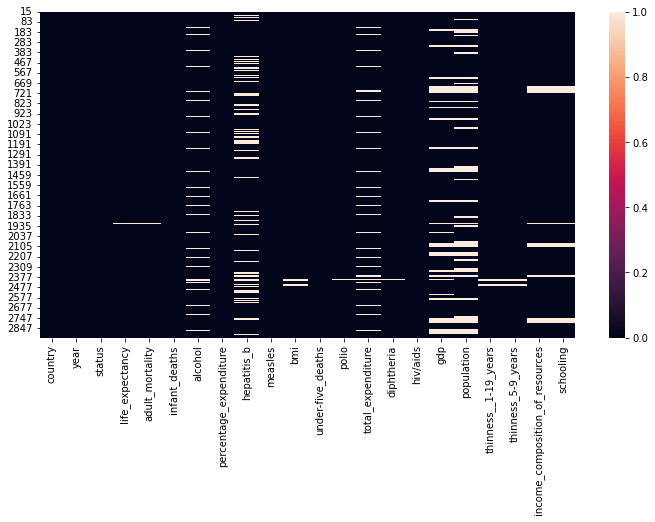

In [1577]:
plt.figure(figsize=(12,6))

sns.heatmap(pd.isnull(LifeExpectancy));

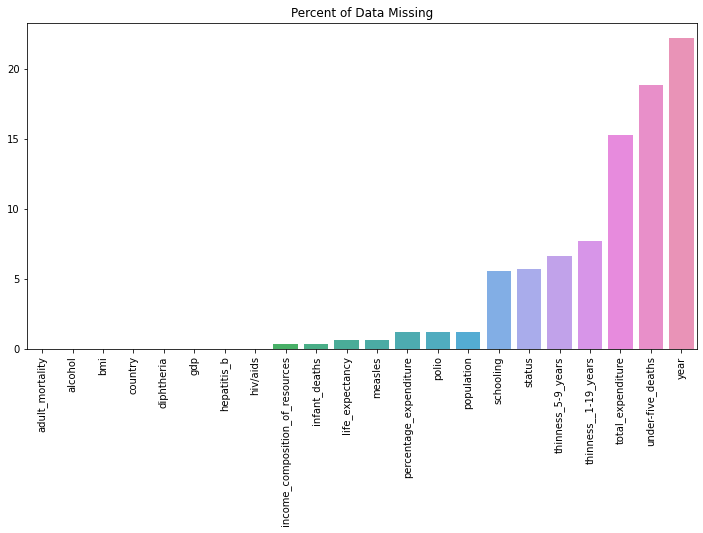

In [1578]:
plt.figure(figsize=(12,6))

plt.title("Percent of Data Missing")
sns.barplot(x=percent_nan.sort_index().index ,y=percent_nan.sort_values())
plt.xticks(rotation=90);

#### Removal of rows with columns that are missing less than 2% of their values

We shall set the threshold for missing column data to be 1.5%

In [1579]:
columns = percent_nan[percent_nan<1.5].index
LifeExpectancy=LifeExpectancy.dropna(axis=0, subset=columns)

In [1580]:
percent_nan = LifeExpectancy.isna().sum()/len(LifeExpectancy)*100
percent_nan.sort_values()

country                             0.000000
thinness_5-9_years                  0.000000
thinness__1-19_years                0.000000
hiv/aids                            0.000000
diphtheria                          0.000000
polio                               0.000000
under-five_deaths                   0.000000
measles                             0.000000
bmi                                 0.000000
percentage_expenditure              0.000000
infant_deaths                       0.000000
adult_mortality                     0.000000
life_expectancy                     0.000000
status                              0.000000
year                                0.000000
income_composition_of_resources     5.540166
schooling                           5.540166
alcohol                             6.059557
total_expenditure                   7.340720
gdp                                15.062327
hepatitis_b                        18.178670
population                         22.299169
dtype: flo

#### Checking income_composition_of_resources and schooling columns

In [1581]:
LifeExpectancy[LifeExpectancy.income_composition_of_resources.isnull()].head(10)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
704,Czechia,2000,Developed,74.7,126.0,0,13.22,0.0,NaN,9,...,98.0,6.31,98.0,0.1,NaN,NaN,2.3,2.3,NaN,NaN
703,Czechia,2001,Developed,75.1,123.0,0,13.36,0.0,NaN,6,...,97.0,6.42,98.0,0.1,NaN,NaN,2.2,2.3,NaN,NaN
702,Czechia,2002,Developed,75.3,12.0,0,13.47,0.0,86.0,4,...,97.0,6.80,98.0,0.1,NaN,NaN,2.2,2.3,NaN,NaN
701,Czechia,2003,Developed,75.2,122.0,0,13.01,0.0,92.0,30,...,97.0,7.13,97.0,0.1,NaN,NaN,2.2,2.2,NaN,NaN
700,Czechia,2004,Developed,75.8,116.0,0,13.24,0.0,98.0,17,...,96.0,6.90,98.0,0.1,NaN,NaN,2.1,2.2,NaN,NaN
699,Czechia,2005,Developed,75.9,114.0,0,13.19,0.0,99.0,0,...,96.0,6.93,97.0,0.1,NaN,NaN,2.1,2.1,NaN,NaN
698,Czechia,2006,Developed,76.5,19.0,0,13.03,0.0,98.0,7,...,98.0,6.69,98.0,0.1,NaN,NaN,2.0,2.1,NaN,NaN
697,Czechia,2007,Developed,76.8,17.0,0,13.43,0.0,99.0,2,...,99.0,6.52,99.0,0.1,NaN,NaN,2.0,2.1,NaN,NaN
696,Czechia,2008,Developed,77.0,16.0,0,13.25,0.0,99.0,2,...,99.0,6.82,99.0,0.1,NaN,NaN,1.9,2.0,NaN,NaN
695,Czechia,2009,Developed,77.1,12.0,0,13.23,0.0,99.0,5,...,99.0,7.85,99.0,0.1,NaN,NaN,1.9,2.0,NaN,NaN


In [1582]:
LifeExpectancy[LifeExpectancy.income_composition_of_resources.isnull()].groupby('country').count()['year']

country
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Republic of Korea                                       16
Republic of Moldova                                     16
Somalia                                                 16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
United States of America                                16
Name: year, dtype: int64

In [1583]:
LifeExpectancy[LifeExpectancy.schooling.isnull()].groupby('country').count()['year']

country
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Republic of Korea                                       16
Republic of Moldova                                     16
Somalia                                                 16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
United States of America                                16
Name: year, dtype: int64

In the dataset, it can be seen that both schooling and income_composition_of_resources are missing values in the same rows. Additionally, it can also be seen that in some countries, all of the data in both columns are missing. Therefore, I have decided to impute the missing data using the mean of developping or developed statuses.

In [1584]:
# Imputation of missing null values of schooling column using the mean "status"
LifeExpectancy.schooling = LifeExpectancy.groupby(
    'status').schooling.apply(lambda x: x.fillna(x.mean()))


In [1585]:
# Imputation of missing null values of income_composition_of_resources column using the mean "status"
LifeExpectancy.income_composition_of_resources = LifeExpectancy.groupby(
    'status').income_composition_of_resources.apply(lambda x: x.fillna(x.mean()))


In [1586]:
percent_nan = LifeExpectancy.isna().sum()/len(LifeExpectancy)*100
percent_nan.sort_values()

country                             0.000000
thinness_5-9_years                  0.000000
thinness__1-19_years                0.000000
hiv/aids                            0.000000
diphtheria                          0.000000
polio                               0.000000
under-five_deaths                   0.000000
income_composition_of_resources     0.000000
measles                             0.000000
bmi                                 0.000000
percentage_expenditure              0.000000
infant_deaths                       0.000000
adult_mortality                     0.000000
life_expectancy                     0.000000
status                              0.000000
year                                0.000000
schooling                           0.000000
alcohol                             6.059557
total_expenditure                   7.340720
gdp                                15.062327
hepatitis_b                        18.178670
population                         22.299169
dtype: flo

#### Checking alcohol column next

In [1587]:
LifeExpectancy[LifeExpectancy.alcohol.isnull()].head(10)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.0,93.0,309,...,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.0,96.0,0,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,NaN,0.0,98.0,0,...,98.0,NaN,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5


In [1588]:
# Number of null values missing per country
alcohol_missing = LifeExpectancy[LifeExpectancy.alcohol.isnull()].groupby('country').count()['year']
alcohol_missing.head(10)

country
Algeria                1
Angola                 1
Antigua and Barbuda    1
Argentina              1
Armenia                1
Australia              1
Austria                1
Azerbaijan             1
Bahamas                1
Bahrain                1
Name: year, dtype: int64

In [1589]:
# Checking if the number of null values missing per country is more than one
alcohol_missing[alcohol_missing > 1].sum()

0

Based on the queries, it can be seen that the alcohol column is missing data in 2015. Therefore, a simple forward fill can be used to impute data from 2014

In [1590]:
LifeExpectancy.alcohol = LifeExpectancy.groupby('country').alcohol.fillna(method='ffill')

In [1591]:
percent_nan = LifeExpectancy.isna().sum()/len(LifeExpectancy)*100
percent_nan.sort_values()

country                             0.000000
thinness_5-9_years                  0.000000
thinness__1-19_years                0.000000
hiv/aids                            0.000000
diphtheria                          0.000000
polio                               0.000000
under-five_deaths                   0.000000
income_composition_of_resources     0.000000
measles                             0.000000
bmi                                 0.000000
percentage_expenditure              0.000000
alcohol                             0.000000
infant_deaths                       0.000000
adult_mortality                     0.000000
life_expectancy                     0.000000
status                              0.000000
year                                0.000000
schooling                           0.000000
total_expenditure                   7.340720
gdp                                15.062327
hepatitis_b                        18.178670
population                         22.299169
dtype: flo

#### Checking total_expenditure column next

In [1592]:
# Checking null value rows
LifeExpectancy[LifeExpectancy.total_expenditure.isnull()].head(10)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
32,Algeria,2015,Developing,75.6,19.0,21,0.01,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,8.33,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,8.56,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,7.93,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,3.91,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
112,Australia,2015,Developed,82.8,59.0,1,9.71,0.0,93.0,74,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,12.32,0.0,93.0,309,...,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,0.01,0.0,96.0,0,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,9.45,0.0,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,1.57,0.0,98.0,0,...,98.0,NaN,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5


In [1593]:
# Number of null values missing per country
total_expenditure_missing = LifeExpectancy[LifeExpectancy.total_expenditure.isnull(
)].groupby('country').count()['year']
total_expenditure_missing.head(10)

country
Algeria                1
Angola                 1
Antigua and Barbuda    1
Argentina              1
Armenia                1
Australia              1
Austria                1
Azerbaijan             1
Bahamas                1
Bahrain                1
Name: year, dtype: int64

In [1594]:
# Checking if the number of null values missing per country is more than one
total_expenditure_missing[total_expenditure_missing > 1]

country
Democratic People's Republic of Korea    16
Iraq                                      4
Somalia                                  16
Name: year, dtype: int64

In [1595]:
# Checking Iraq row
LifeExpectancy[LifeExpectancy.country=='Iraq'].sort_values('year')

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1249,Iraq,2000,Developing,70.0,144.0,30,0.20,0.000000,67.0,726,...,83.0,NaN,8.0,0.1,NaN,23565413.0,5.6,5.4,0.603,8.6
1248,Iraq,2001,Developing,72.0,142.0,30,0.17,0.000000,66.0,4088,...,8.0,NaN,78.0,0.1,NaN,24251649.0,5.6,5.3,0.607,8.7
1247,Iraq,2002,Developing,74.0,14.0,30,0.15,0.000000,65.0,0,...,76.0,NaN,77.0,0.1,NaN,24939299.0,5.5,5.3,0.614,9.1
1246,Iraq,2003,Developing,66.5,213.0,30,0.07,0.000000,63.0,0,...,73.0,4.36,75.0,0.1,NaN,25627626.0,5.5,5.2,0.616,9.4
1245,Iraq,2004,Developing,67.2,21.0,30,0.32,44.120596,62.0,9081,...,69.0,5.61,74.0,0.1,1391.816923,2631669.0,5.4,5.2,0.603,9.8
1244,Iraq,2005,Developing,66.8,29.0,31,0.18,59.188452,65.0,908,...,69.0,4.13,65.0,0.1,1849.639110,278426.0,5.4,5.2,0.628,10.1
1243,Iraq,2006,Developing,64.7,249.0,31,0.03,75.257998,59.0,474,...,63.0,3.00,59.0,0.1,2351.812429,27697912.0,5.4,5.1,0.631,10.2
1242,Iraq,2007,Developing,65.9,227.0,31,0.14,146.760649,56.0,230,...,74.0,3.69,57.0,0.1,3129.224922,2839433.0,5.4,5.1,0.636,10.2
1241,Iraq,2008,Developing,69.3,167.0,32,0.17,192.156300,66.0,5494,...,71.0,3.93,69.0,0.1,4521.324700,29111417.0,5.4,5.1,0.638,10.3
1240,Iraq,2009,Developing,74.0,148.0,32,0.20,185.636698,75.0,30328,...,78.0,4.65,78.0,0.1,3735.144836,29894652.0,5.4,5.1,0.643,10.3


The countries Democratic People's Republic of Korea and Somalia are missing almost all data in the total_expenditure column. An imputation of the the missing data using the mean of developping or developed statuses should be appropriate

Iraq is missing some values in the total_expenditure column at some various places. An imputation using the mean total_expenditure value of Iraq would be the most appropriate.

As for rest of the columns, they are only missing data in 2015, a simple back fill will be appropriate

In [1596]:
#Replacing Democratic People's Republic of Korea's missing total_expenditure values with mean developed total expenditure
LifeExpectancy.loc[LifeExpectancy.country == "Democratic People's Republic of Korea",
                   "total_expenditure"] = LifeExpectancy.groupby('status').mean()['total_expenditure']['Developed']

#Replacing Somalia's missing total_expenditure values with mean developing total expenditure                
LifeExpectancy.loc[LifeExpectancy.country == "Somalia", "total_expenditure"] = LifeExpectancy.groupby(
    'status').mean()['total_expenditure']['Developing']


In [1597]:
# Forward filling rows that are only missing data in 2015
LifeExpectancy.total_expenditure = LifeExpectancy.groupby(
    'country').total_expenditure.fillna(method='ffill')


In [1598]:
# Filling remaining data in Iraq row
LifeExpectancy.total_expenditure = LifeExpectancy.groupby(
    'country').total_expenditure.apply(lambda x: x.fillna(x.mean()))


In [1599]:
percent_nan = LifeExpectancy.isna().sum()/len(LifeExpectancy)*100
percent_nan.sort_values()

country                             0.000000
thinness_5-9_years                  0.000000
thinness__1-19_years                0.000000
hiv/aids                            0.000000
diphtheria                          0.000000
total_expenditure                   0.000000
polio                               0.000000
under-five_deaths                   0.000000
income_composition_of_resources     0.000000
bmi                                 0.000000
percentage_expenditure              0.000000
alcohol                             0.000000
infant_deaths                       0.000000
adult_mortality                     0.000000
life_expectancy                     0.000000
status                              0.000000
year                                0.000000
measles                             0.000000
schooling                           0.000000
gdp                                15.062327
hepatitis_b                        18.178670
population                         22.299169
dtype: flo

#### Checking data in gdp column

In [1600]:
LifeExpectancy[LifeExpectancy.gdp.isnull()].head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
175,Bahamas,2000,Developing,72.6,192.0,0,12.15,0.0,NaN,0,...,91.0,5.21,99.0,0.1,NaN,NaN,2.7,2.6,0.000,12.0
174,Bahamas,2001,Developing,72.9,189.0,0,11.64,0.0,21.0,0,...,98.0,5.15,99.0,0.2,NaN,NaN,2.7,2.6,0.779,12.1
173,Bahamas,2002,Developing,73.1,19.0,0,10.85,0.0,89.0,0,...,93.0,5.26,94.0,0.1,NaN,NaN,2.6,2.6,0.781,12.1
172,Bahamas,2003,Developing,73.2,189.0,0,10.68,0.0,88.0,0,...,93.0,5.62,92.0,0.1,NaN,NaN,2.6,2.5,0.783,12.2
171,Bahamas,2004,Developing,73.8,174.0,0,10.10,0.0,93.0,0,...,92.0,6.20,93.0,0.1,NaN,NaN,2.6,2.5,0.784,12.3


In [1601]:
gdp_missing = LifeExpectancy[LifeExpectancy.gdp.isnull(
)].groupby('country').count()['year']
gdp_missing.head(15)

country
Bahamas                                  16
Bolivia (Plurinational State of)         16
Congo                                    16
Czechia                                  16
Côte d'Ivoire                            16
Democratic People's Republic of Korea    16
Democratic Republic of the Congo         16
Egypt                                    16
Eritrea                                   4
Gambia                                   16
Iran (Islamic Republic of)               16
Iraq                                      4
Kyrgyzstan                               16
Lao People's Democratic Republic         16
Libya                                     4
Name: year, dtype: int64

From my observation, there seems to be a lot of data missing, hence imputation of mean would be the most optimal solution by imputing developed and developing countries individually

In [1602]:
# Filling null values through imputation
LifeExpectancy.gdp = LifeExpectancy.groupby(
    'status').gdp.apply(lambda x: x.fillna(x.mean()))


In [1603]:
percent_nan = LifeExpectancy.isna().sum()/len(LifeExpectancy)*100
percent_nan.sort_values()

country                             0.000000
thinness_5-9_years                  0.000000
thinness__1-19_years                0.000000
gdp                                 0.000000
hiv/aids                            0.000000
diphtheria                          0.000000
total_expenditure                   0.000000
polio                               0.000000
under-five_deaths                   0.000000
income_composition_of_resources     0.000000
bmi                                 0.000000
percentage_expenditure              0.000000
alcohol                             0.000000
infant_deaths                       0.000000
adult_mortality                     0.000000
life_expectancy                     0.000000
status                              0.000000
year                                0.000000
measles                             0.000000
schooling                           0.000000
hepatitis_b                        18.178670
population                         22.299169
dtype: flo

#### Checking hepatitis_b column

In [1604]:
LifeExpectancy[LifeExpectancy.hepatitis_b.isnull()].head(10)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
63,Angola,2000,Developing,45.3,48.0,97,1.85,15.881493,NaN,2219,...,3.0,2.79,28.0,2.0,555.296942,1644924.0,1.9,1.9,0.382,4.6
62,Angola,2001,Developing,45.7,44.0,97,2.58,30.359936,NaN,9046,...,41.0,5.38,38.0,2.1,526.168743,16983266.0,1.7,1.7,0.391,5.1
61,Angola,2002,Developing,46.5,391.0,96,2.82,24.037942,NaN,11945,...,37.0,3.63,41.0,2.3,711.181716,17572649.0,1.5,1.5,0.401,5.5
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8


In [1605]:
hep_missing = LifeExpectancy[LifeExpectancy.hepatitis_b.isnull(
)].groupby('country').count()['year']
hep_missing.value_counts().sort_index()

1     10
2     18
3     18
4      7
5      8
6      4
7      8
8      3
9      3
10     2
11     2
13     2
14     1
16     9
Name: year, dtype: int64

From my observation, there seems to be a lot of data missing, hence imputation of mean would be the most optimal solution by imputing developed and developing countries individually

In [1606]:
# Filling null values through imputation
LifeExpectancy.hepatitis_b = LifeExpectancy.groupby(
    'status').hepatitis_b.apply(lambda x: x.fillna(x.mean()))


In [1607]:
percent_nan = LifeExpectancy.isna().sum()/len(LifeExpectancy)*100
percent_nan.sort_values()

country                             0.000000
thinness_5-9_years                  0.000000
thinness__1-19_years                0.000000
gdp                                 0.000000
hiv/aids                            0.000000
diphtheria                          0.000000
total_expenditure                   0.000000
polio                               0.000000
under-five_deaths                   0.000000
income_composition_of_resources     0.000000
bmi                                 0.000000
hepatitis_b                         0.000000
percentage_expenditure              0.000000
alcohol                             0.000000
infant_deaths                       0.000000
adult_mortality                     0.000000
life_expectancy                     0.000000
status                              0.000000
year                                0.000000
measles                             0.000000
schooling                           0.000000
population                         22.299169
dtype: flo

#### Regarding Population Column

In [1608]:
LifeExpectancy.corr().population

year                               0.015938
life_expectancy                   -0.022897
adult_mortality                   -0.012899
infant_deaths                      0.556835
alcohol                           -0.035195
percentage_expenditure            -0.026205
hepatitis_b                       -0.127745
measles                            0.265894
bmi                               -0.071956
under-five_deaths                  0.544494
polio                             -0.039206
total_expenditure                 -0.080379
diphtheria                        -0.028881
hiv/aids                          -0.027718
gdp                               -0.028609
population                         1.000000
thinness__1-19_years               0.254257
thinness_5-9_years                 0.251695
income_composition_of_resources   -0.012356
schooling                         -0.038083
Name: population, dtype: float64

Since  population column has a high percentage of null values and a low correlation with life expectancy, I decided to drop that column

In [1609]:
LifeExpectancy=LifeExpectancy.drop(columns='population')

### Dealing with outliers

In [1610]:
LifeExpectancy.corr().life_expectancy.sort_values()

adult_mortality                   -0.693189
hiv/aids                          -0.560382
thinness__1-19_years              -0.476342
thinness_5-9_years                -0.470744
under-five_deaths                 -0.223172
infant_deaths                     -0.197408
measles                           -0.160525
year                               0.170772
total_expenditure                  0.220386
hepatitis_b                        0.232205
percentage_expenditure             0.381173
alcohol                            0.401905
gdp                                0.451848
polio                              0.464166
diphtheria                         0.478194
bmi                                0.567055
income_composition_of_resources    0.709727
schooling                          0.742695
life_expectancy                    1.000000
Name: life_expectancy, dtype: float64

Plotting Life Expectancy against BMI

<AxesSubplot:xlabel='bmi', ylabel='life_expectancy'>

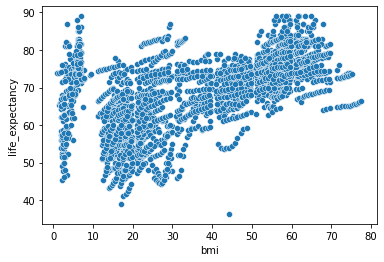

In [1611]:
sns.scatterplot(x=LifeExpectancy.bmi,y=LifeExpectancy.life_expectancy)

In [1612]:
LifeExpectancy[(LifeExpectancy.bmi>40)& (LifeExpectancy.life_expectancy<40)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1127,Haiti,2010,Developing,36.3,682.0,23,5.76,36.292918,79.846344,0,...,58,66.0,8.9,66.0,1.9,662.279518,4.0,4.0,0.47,8.6


A single outlier can be seen at the bottom of the graph. After further analysis, the low life expectancy is caused by an earthquake in Haiti in 2010. Therefore, i decided to drop that row.

In [1613]:
LifeExpectancy = LifeExpectancy.drop(1127)

#### Plotting life_expectancy against income_composition_of_resources

<AxesSubplot:xlabel='income_composition_of_resources', ylabel='life_expectancy'>

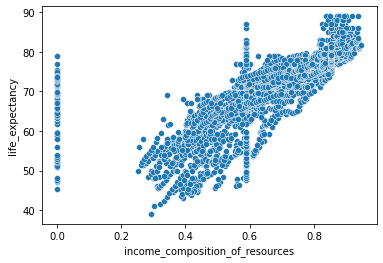

In [1614]:
sns.scatterplot(x=LifeExpectancy.income_composition_of_resources,y=LifeExpectancy.life_expectancy)

Google Search has shown that human development index is never 0, thus I decided to treat the 0 values as null values and impute them with the average HDI by country

In [1615]:
LifeExpectancy[LifeExpectancy.income_composition_of_resources ==
               0].groupby('country').count()['year']


country
Antigua and Barbuda                           6
Bahamas                                       1
Bhutan                                       11
Bosnia and Herzegovina                        6
Burkina Faso                                  6
Cabo Verde                                    1
Chad                                          1
Comoros                                       5
Equatorial Guinea                             1
Eritrea                                       6
Ethiopia                                      1
Georgia                                       1
Grenada                                      11
Guinea-Bissau                                 6
Kiribati                                      6
Lebanon                                       6
Madagascar                                    1
Micronesia (Federated States of)              1
Nigeria                                       4
Oman                                          1
Saint Lucia                     

In [1616]:
# Filling 0 values through imputation
LifeExpectancy.income_composition_of_resources = LifeExpectancy.groupby(
    'country').income_composition_of_resources.apply(lambda x: x.replace(0,x.mean()))

# Feature Engineering

#### Dropping of Columns

In [1617]:
LifeExpectancy.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [1618]:
drop_columns=['adult_mortality','infant_deaths','under-five_deaths','year']
data=LifeExpectancy.drop(columns=drop_columns).copy()

#### Making Dummy Variables using one hot encoding

In [1619]:
data.select_dtypes(include='object').columns

Index(['country', 'status'], dtype='object')

In [1620]:
data_obj = data.select_dtypes(include='object')
data_num = data.select_dtypes(exclude='object')

In [1621]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 15 to 2922
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   life_expectancy                  2887 non-null   float64
 1   alcohol                          2887 non-null   float64
 2   percentage_expenditure           2887 non-null   float64
 3   hepatitis_b                      2887 non-null   float64
 4   measles                          2887 non-null   int64  
 5   bmi                              2887 non-null   float64
 6   polio                            2887 non-null   float64
 7   total_expenditure                2887 non-null   float64
 8   diphtheria                       2887 non-null   float64
 9   hiv/aids                         2887 non-null   float64
 10  gdp                              2887 non-null   float64
 11  thinness__1-19_years             2887 non-null   float64
 12  thinness_5-9_years 

In [1622]:
data_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 15 to 2922
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  2887 non-null   object
 1   status   2887 non-null   object
dtypes: object(2)
memory usage: 67.7+ KB


In [1623]:
data_obj = pd.get_dummies(data_obj, drop_first=True)

In [1624]:
final_data = pd.concat([data_num, data_obj], axis=1)

#### Checking for normality

In [1625]:
y=final_data['life_expectancy'].copy()
X=final_data.drop(columns='life_expectancy').copy()

In [1626]:
# Kurtosis Values
X.kurt()[:14]

alcohol                             -0.814586
percentage_expenditure              26.071440
hepatitis_b                          4.133628
measles                            112.937190
bmi                                 -1.313471
polio                                3.848821
total_expenditure                    1.051175
diphtheria                           3.630258
hiv/aids                            34.349218
gdp                                 13.748260
thinness__1-19_years                 3.973771
thinness_5-9_years                   4.361639
income_composition_of_resources     -0.584411
schooling                            0.528595
dtype: float64

In [1627]:
# Skewness Values
X.skew()[:14]

alcohol                            0.588999
percentage_expenditure             4.608930
hepatitis_b                       -2.160680
measles                            9.364848
bmi                               -0.228067
polio                             -2.112675
total_expenditure                  0.585524
diphtheria                        -2.088688
hiv/aids                           5.360385
gdp                                3.325406
thinness__1-19_years               1.711485
thinness_5-9_years                 1.777502
income_composition_of_resources   -0.433063
schooling                         -0.425481
dtype: float64

To prove a normal distribution, skewness should be between -2 and +2, while kurtosis should be between -7 and +7

Therefore, only the columns below are normally distributed and the rest of the columns need to be transformed:

alcohol, bmi, total_expenditure, thinness__1-19_years, thinness_5-9_years, income_composition_of_resources and schooling

Additionally, since some of the columns contain 0 values, a Yeo-Johnson transformer would be most suitable.

In [1628]:
ct = ColumnTransformer(
         [("Yeo-Johnson", PowerTransformer(), [1,2,3,5,7,9])],
         remainder='passthrough')
ct.fit_transform(X)

array([[-0.59238288, -1.3798077 ,  1.49260444, ...,  0.        ,
         0.        ,  1.        ],
       [-0.58773659, -1.33669109,  1.54291574, ...,  0.        ,
         0.        ,  1.        ],
       [-0.43185197, -1.29235673,  1.31474496, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.5849123 ,  0.76526155, -1.1398429 , ...,  0.        ,
         1.        ,  1.        ],
       [-0.58017525,  0.41820623, -1.1398429 , ...,  0.        ,
         1.        ,  1.        ],
       [-1.44335419,  0.09703257, -1.1398429 , ...,  0.        ,
         1.        ,  1.        ]])

#### Train | Test Split

In [1629]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Scaling the Data


In [1630]:
scaler = StandardScaler()

In [1631]:
scaler.fit(X_train)

StandardScaler()

In [1632]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1633]:
X_train

array([[-0.52226995, -0.33149428,  0.73306534, ..., -0.07399568,
        -0.07730521,  0.46569032],
       [-1.11559468, -0.1137898 ,  0.77811149, ..., -0.07399568,
        -0.07730521,  0.46569032],
       [ 0.77470848, -0.17151878, -2.42016545, ..., -0.07399568,
        -0.07730521,  0.46569032],
       ...,
       [-0.71105509, -0.34378774,  0.10241918, ..., -0.07399568,
        -0.07730521,  0.46569032],
       [ 1.66224382,  0.86655402,  0.55288072, ..., -0.07399568,
        -0.07730521, -2.14734979],
       [-1.11559468, -0.36138338,  0.59792687, ..., -0.07399568,
        -0.07730521,  0.46569032]])

# Modelling

In [1634]:
elastic_model = ElasticNetCV()

In [1635]:
elastic_model.fit(X_train,y_train)

ElasticNetCV()

In [1636]:
elastic_model.l1_ratio_

0.5

In [1637]:
test_predictions = elastic_model.predict(X_test)

In [1638]:
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [1639]:
RMSE

2.0698444255167927

In [1640]:
r2_score(y_test,test_predictions)

0.9528509670378602

In [1641]:
elastic_model.coef_

array([-3.03839046e-01,  4.18685992e-03, -3.63624509e-02, -1.30557627e-01,
        7.65991203e-02,  2.67365209e-01,  3.25959841e-02,  2.91620644e-01,
       -2.02630264e+00,  7.06046976e-02, -3.37069033e-01, -2.22738511e-01,
        2.95878110e+00,  1.44239024e+00,  3.40708524e-01,  1.82469112e-01,
       -7.55680349e-01,  5.91777738e-01,  5.13068112e-02,  2.25750102e-01,
        1.24888528e-02,  2.07468211e-01,  4.90610562e-02,  1.71119534e-01,
        1.43928316e-01,  3.33264368e-01,  1.11409239e-01, -1.30548749e-01,
        4.94051691e-02, -6.32962750e-02, -4.05120669e-01,  4.00821444e-01,
       -1.90315259e-01,  5.00214224e-01, -4.30712858e-01,  1.14147527e-01,
        1.55636004e-01, -1.73838456e-01, -2.62469876e-01, -3.58796177e-01,
        3.88651411e-01, -0.00000000e+00, -5.95232309e-01,  2.95342724e-01,
       -5.93519760e-01, -5.64784293e-01,  4.06317384e-01,  4.29597866e-01,
        1.98978841e-01, -1.53784072e-01, -3.70267167e-01,  5.23082152e-01,
        1.61771904e-02,  

In [1642]:
test_res= y_test - test_predictions

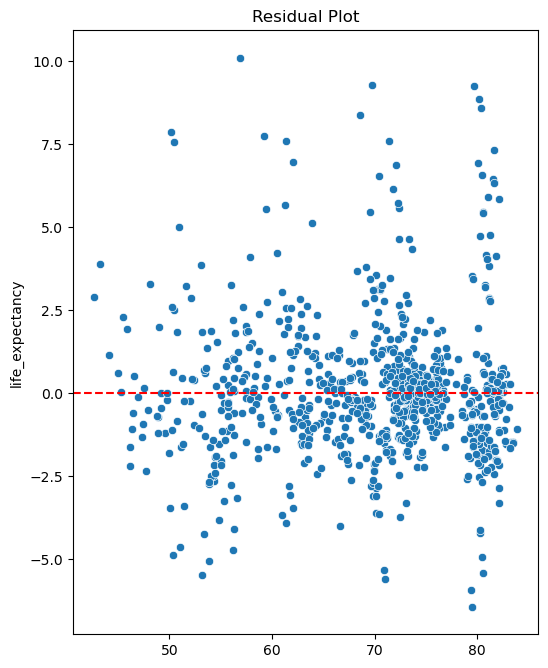

In [1643]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

plt.title('Residual Plot')
sns.scatterplot(x=test_predictions,y=test_res, ax=ax)
plt.axhline(y=0, color='r', linestyle='--');

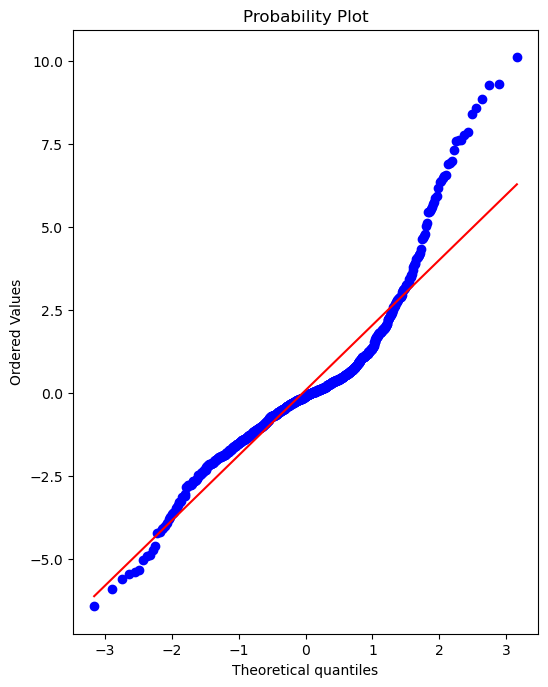

In [1644]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_res,plot=ax)